In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_complete = pd.read_excel("/Users/salauddinali/Desktop/formatted_normalized_complete_data.xlsx")

In [2]:
df_unique = df_complete.drop_duplicates(subset=["Reviewer_Name"])

In [3]:
print (df_unique.shape)
df_unique.head(2)

(23458, 15)


,Restaurant_rating,Restaurant_name,Reviewer_Name,Reviewer_Level,Reviewer_Age,Reviewer_Location,Contributions,Visited_cities,Helpful_votes,Photos,Excellent,Very_good,Average,Poor,Terrible
0,3.5,"Fil's Diner, Ottawa",ADP,2,0,1,5,2.0,1.0,NaN,1.0,3.0,1.0,0.0,0.0
1,3.5,"Fil's Diner, Ottawa",Dbot,5,6,1,96,27.0,29.0,1.0,26.0,44.0,15.0,8.0,4.0


In [4]:
df_unique=df_unique.fillna(0)
df_unique.shape

(23458, 15)

This the Kurtosis value for each feature [-6.45802224e-01  4.43055488e+02  1.76819796e+03]
This is the Skewness value for each feature [ 0.19768101 12.88352447 36.88782786]


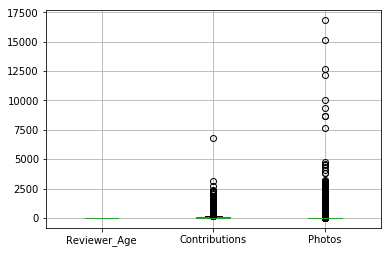

In [35]:
import seaborn as sns
df_goal1 = df_unique[["Reviewer_Age", "Contributions","Photos"]]
from scipy.stats import kurtosis
from scipy.stats import skew
print ("This the Kurtosis value for each feature",kurtosis(df_goal1))
print ("This is the Skewness value for each feature",skew(df_goal1))
df_goal1.head(3)

df_goal1.boxplot()
#sns.boxplot(data=df_goal1, orient="h", palette="Set2")

In [7]:
from pandas.api.types import is_numeric_dtype
def remove_outlier(df):
    low = 0.00
    high = 0.80
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
    return df
df_goal1 = remove_outlier(df_goal1)

In [8]:
df_goal1.shape

(3735, 3)

[[0.84654153 1.95289901 0.68577913]
 [1.0174718  1.03998472 1.39186185]
 [0.84654153 0.57104051 0.33950563]
 ...
 [1.0174718  0.34187379 1.03205263]
 [0.55146847 0.40993798 1.03205263]
 [1.48347514 0.57104051 0.00676786]]
[[0.84654153 1.95289901 0.68577913]
 [1.0174718  1.03998472 1.39186185]
 [0.84654153 0.57104051 0.33950563]
 ...
 [1.0174718  0.34187379 1.03205263]
 [0.55146847 0.40993798 1.03205263]
 [1.48347514 0.57104051 0.00676786]]
(3673, 3)


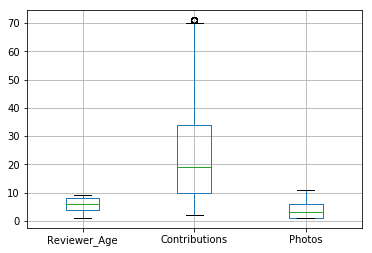

In [9]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_goal1))
print(z)

#Dropping z>3
goal1_clean = df_goal1[(z < 2.5).all(axis=1)]

#New z score
z = np.abs(stats.zscore(df_goal1))
print(z)

goal1_clean.boxplot()
print (goal1_clean.shape)

Q1 = goal1_clean.quantile(0.25)
Q3 = goal1_clean.quantile(0.75)
IQR = Q3 - Q1
goal1_clean = goal1_clean[~((goal1_clean < (Q1 - 1.5 * IQR)) |(goal1_clean > (Q3 + 1.5 * IQR))).any(axis=1)]




(3662, 3)


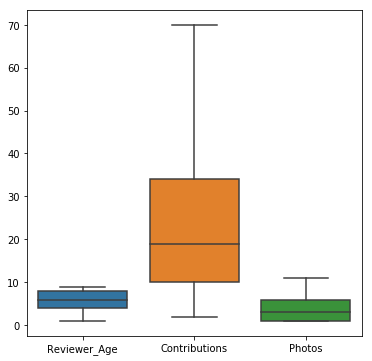

In [10]:
plt.figure(figsize=(6,6))
sns.boxplot(data=goal1_clean)
print (goal1_clean.shape)

In [11]:
goal1_clean.skew()

Reviewer_Age    -0.219912
Contributions    0.837931
Photos           0.837411
dtype: float64

In [12]:
goal1_clean.kurtosis()

Reviewer_Age    -0.922872
Contributions   -0.216726
Photos          -0.358305
dtype: float64

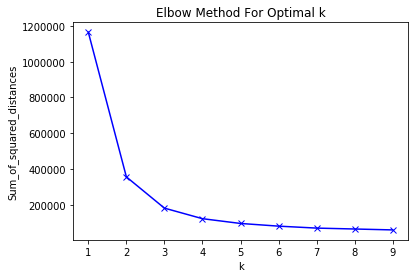

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
K = range(1, 10)
Sum_of_squared_distances = []
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(goal1_clean)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-', )
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [18]:
from sklearn.metrics import silhouette_score
cluster_kmeans = KMeans(n_clusters=3)
goal1_clus = cluster_kmeans.fit(goal1_clean)
print (silhouette_score(goal1_clean, list(goal1_clus.labels_)))


0.5271201495904378


In [93]:
goal1_clean["Cluster_label"] = list(goal1_clus.labels_)



In [103]:
goal1_clean["Cluster_label"] = goal1_clean["Cluster_label"].replace(0, "Cluster 1")
goal1_clean["Cluster_label"] = goal1_clean["Cluster_label"].replace(1, "Cluster 3")
goal1_clean["Cluster_label"] = goal1_clean["Cluster_label"].replace(2, "Cluster 2")



ValueError: could not convert string to float: 'Mark D'

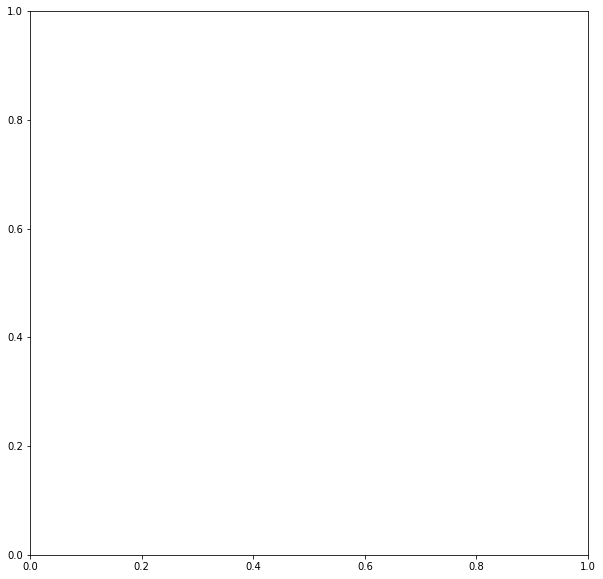

In [104]:
from matplotlib import cm
#cmap = cm.get_cmap('PuOr')
plt.figure(figsize=(10,10))
pd.plotting.parallel_coordinates(goal1_clean, "Cluster_label",color=["red", "blue", "green"])
plt.title("Objective 1 - Considering Age, Contribution, Photos")



In [94]:
df_zero = goal1_clean[goal1_clean["Cluster_label"] == 0]
df_one = goal1_clean[goal1_clean["Cluster_label"] == 1]
df_two = goal1_clean[goal1_clean["Cluster_label"] == 2]

In [95]:
df_zero.shape

(1927, 5)

In [96]:
df_one.shape

(594, 5)

In [97]:
df_two.shape

(1141, 5)

In [98]:
df_zero.mean()

Reviewer_Age      5.406331
Contributions    10.225739
Photos            3.484172
Cluster_label     0.000000
dtype: float64

In [99]:
df_one.mean()

Reviewer_Age      6.405724
Contributions    55.138047
Photos            4.575758
Cluster_label     1.000000
dtype: float64

In [100]:
df_two.mean()

Reviewer_Age      6.151621
Contributions    29.959684
Photos            4.470640
Cluster_label     2.000000
dtype: float64

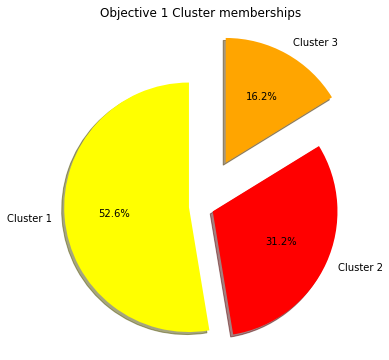

In [85]:
size_l = [len(df_zero), len(df_one), len(df_two)]
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
plt.figure(figsize=(8,8))


%matplotlib inline

# Pie chart, where the slices will be ordered and plotted counter-clockwise
labels = ["Cluster 1", "Cluster 2", "Cluster 3"]
sizes = size_l
# Explode out the 'Chemical' pie piece by offsetting it a greater amount
explode = (0.1, 0.1, 0.4)

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(sizes,
       explode=explode,
       labels=labels,
       colors = ["yellow", "red", "orange"],
       autopct='%1.1f%%',
       shadow=True,
       startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Objective 1 Cluster memberships')

plt.show()

In [38]:
rev_indexes = (goal1_clean.index.values)
temp_df = df_complete.loc[rev_indexes]
goal1_clean["Reviewer_name"] = temp_df["Reviewer_Name"]

In [32]:
goal1_clean.head(10)

,Reviewer_Age,Contributions,Photos,Cluster_label,Reviewer_name
2,4,61,2.0,Cluster 1,Mark D
19,8,44,8.0,Cluster 1,ACN2014
20,4,14,3.0,Cluster 3,StonebridgeFoodie
26,5,27,2.0,Cluster 2,Rachel C
43,7,17,6.0,Cluster 3,snaik1978
45,5,8,1.0,Cluster 3,ACottawa
74,5,9,1.0,Cluster 3,Arsho M
83,3,12,3.0,Cluster 3,marose4
87,3,58,3.0,Cluster 1,G S
92,3,22,5.0,Cluster 2,Rutland44


In [34]:
#To Ruthvik
goal1_clean.to_excel("/Users/salauddinali/Desktop/Final_Goal1.xlsx")

In [43]:
goal1_clean.corr()

,Reviewer_Age,Contributions,Photos
Reviewer_Age,1.000000,0.212375,0.050199
Contributions,0.212375,1.000000,0.152118
Photos,0.050199,0.152118,1.000000


In [44]:
goal1_clean.skew()

Reviewer_Age    -0.219912
Contributions    0.837931
Photos           0.837411
dtype: float64

In [45]:
goal1_clean.kurtosis()

Reviewer_Age    -0.922872
Contributions   -0.216726
Photos          -0.358305
dtype: float64

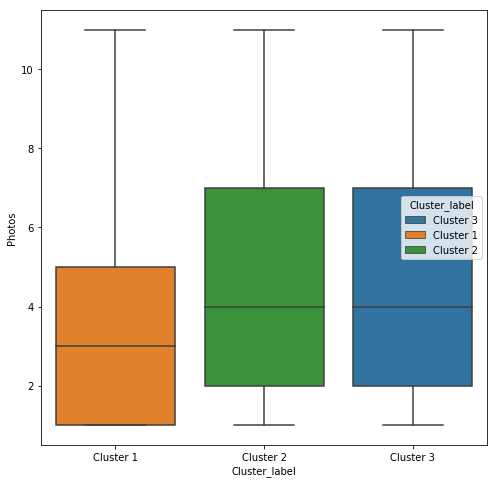

In [108]:
plt.figure(figsize=(8,8))
sns.boxplot(x="Cluster_label", y="Photos", hue="Cluster_label", order=["Cluster 1", "Cluster 2", "Cluster 3"],data=goal1_clean, dodge=False)



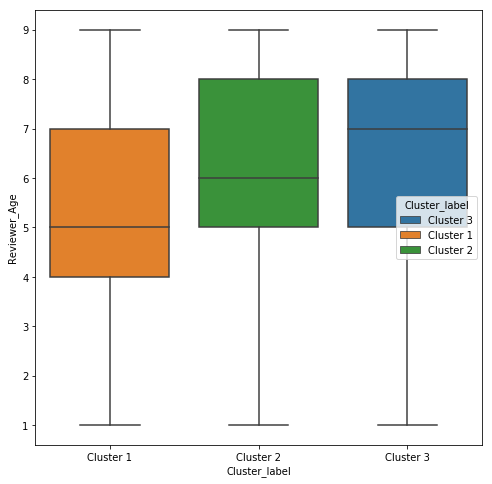

In [111]:
plt.figure(figsize=(8,8))
sns.boxplot(x="Cluster_label", y="Reviewer_Age", hue="Cluster_label",data=goal1_clean,order=["Cluster 1", "Cluster 2", "Cluster 3"], dodge=False)

In [90]:
df_one.mean()

Reviewer_Age      6.151621
Contributions    29.959684
Photos            4.470640
dtype: float64

In [91]:
df_two.mean()

Reviewer_Age      6.405724
Contributions    55.138047
Photos            4.575758
dtype: float64

In [92]:
df_zero.mean()

Reviewer_Age      5.406331
Contributions    10.225739
Photos            3.484172
dtype: float64

In [89]:
df_two.head()

,Reviewer_Age,Contributions,Photos,Cluster_label,Reviewer_name
2,4,61,2.0,Cluster 1,Mark D
19,8,44,8.0,Cluster 1,ACN2014
87,3,58,3.0,Cluster 1,G S
155,3,48,1.0,Cluster 1,Richard H
252,6,57,3.0,Cluster 1,agent713


In [112]:
goal1_clean.shape

(3662, 5)

In [114]:
goal1_clean.kurtosis()

Reviewer_Age    -0.922872
Contributions   -0.216726
Photos          -0.358305
dtype: float64

In [118]:
goal1_clean.head(2)

,Reviewer_Age,Contributions,Photos,Cluster_label,Reviewer_name
2,4,61,2.0,Cluster 3,Mark D
19,8,44,8.0,Cluster 3,ACN2014


In [119]:
df_one.shape
df_new = goal1_clean[["Reviewer_Age", "Contributions", "Photos", "Cluster_label"]]

Text(0.5,1,'Objective 1 - Considering Age, Contribution, Photos')

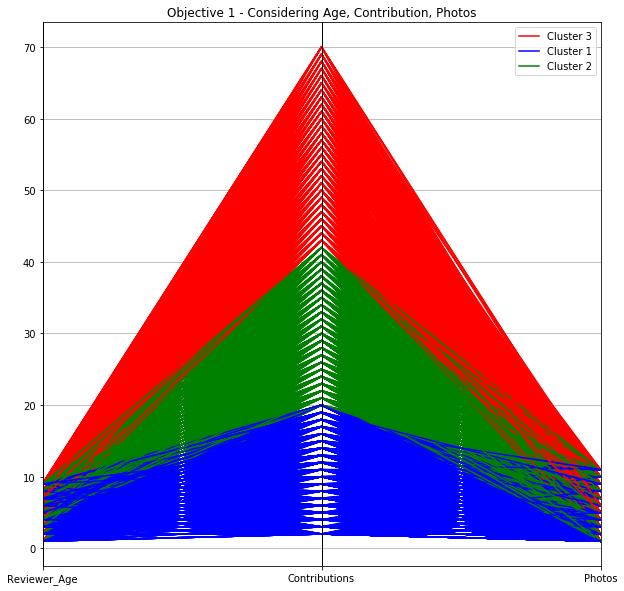

In [122]:
from matplotlib import cm
#cmap = cm.get_cmap('PuOr')
plt.figure(figsize=(10,10))
pd.plotting.parallel_coordinates(df_new, "Cluster_label",color=["red", "blue", "green"])
plt.title("Objective 1 - Considering Age, Contribution, Photos")


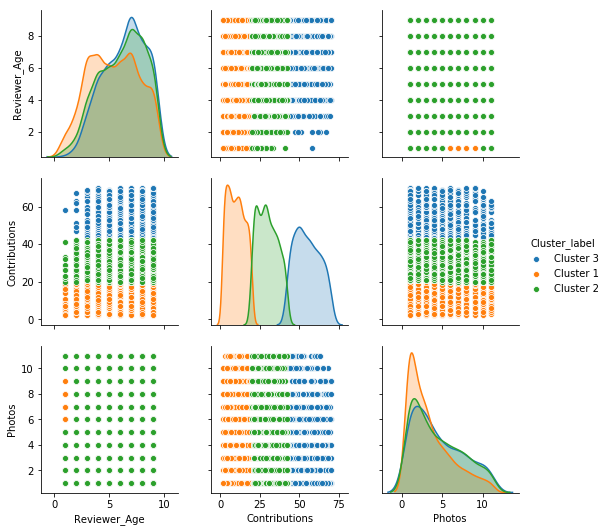

In [125]:
sns.pairplot(df_new, hue="Cluster_label")